In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1


In [17]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

from tensorflow import keras

import io

In [3]:
tf.__version__

'2.15.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1417 - accuracy: 0.9554 - val_loss: 0.0592 - val_accuracy: 0.9807
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0309 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0250 - val_accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0317 - val_accuracy: 0.9898


In [30]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)  # Obtém as classes previstas


313/313 [==============================] - 2s 6ms/step


In [32]:
classes=[0,1,2,3,4,5,6,7,8,9]

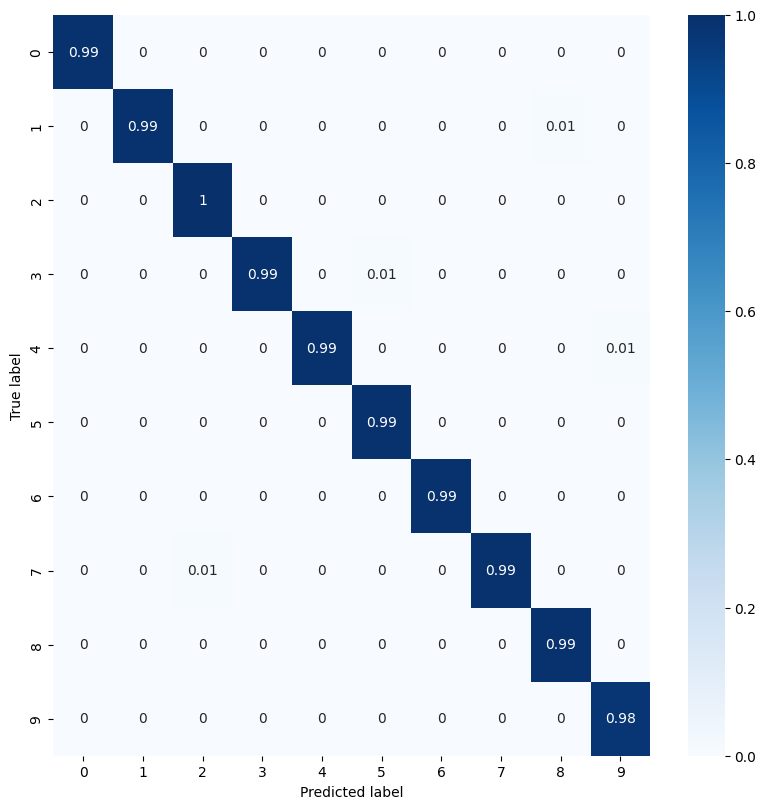

In [33]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

O trecho do código calcula as principais métricas de avaliação de modelos de classificação a partir de uma matriz de confusão. Para exemplificar foram calculados apenas as métricas da classe 0.

Para implementar essas métricas, os valores de VP (Verdadeiros Positivos), VN (Verdadeiros Negativos), FP (Falsos Positivos) e FN (Falsos Negativos) são extraídos da matriz de confusão e inseridos nas fórmulas. Por fim, os resultados são apresentados, destacando o desempenho do modelo.

- Sensibilidade (Recall): mede a capacidade do modelo em identificar corretamente os casos positivos da classe-alvo.
- Especificidade: avalia a proporção de negativos corretamente identificados.
- Acurácia: representa a proporção de predições corretas (positivas e negativas) em relação ao total de amostras.
- Precisão: verifica a proporção de casos positivos preditos que realmente pertencem à classe-alvo.
- F-score: é a média harmônica entre precisão e sensibilidade, balanceando as duas métricas.

In [34]:
import numpy as np

# Matriz de confusão
VP = con_mat[0, 0]
FP = con_mat[1, 0]
FN = con_mat[0, 1]
VN = con_mat[1, 1]

# Total de amostras
N = con_mat.sum()

# Métricas para classe 0
sensibilidade = VP / (VP + FN)  # Sensibilidade
especificidade = VN / (VN + FP)  # Especificidade
acuracia = (VP + VN) / N  # Acurácia
precisao = VP / (VP + FP)  # Precisão
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)  # F-score

# Exibir resultados
print(f"Sensibilidade (Recall): {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"F-score: {f_score:.2f}")


Sensibilidade (Recall): 1.00
Especificidade: 1.00
Acurácia: 0.21
Precisão: 1.00
F-score: 1.00
